Preproccessing Process Flow

1. Read image
2. Resize image
3. Remove noise(Denoise)
4. Morphology(smoothing edges)
5. Segmentation & Annotation

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
import glob

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [ ]:
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
data_path = glob.glob("/content/drive/My Drive/Braynix/img/*");
print(data_path)
print(len(data_path))

['/content/drive/My Drive/Braynix/img/img1.jpg', '/content/drive/My Drive/Braynix/img/img2.jpg']
2


In [ ]:
###### 1. Loading Images #########

import os
path = "/content/drive/My Drive/Braynix/" 


imgs_path = sorted([os.path.join(path, 'img', file) for file in os.listdir(path + "img") if file.endswith('.jpg')])
print(imgs_path)

['/content/drive/My Drive/Braynix/img/img1.jpg', '/content/drive/My Drive/Braynix/img/img2.jpg']


In [ ]:
######## 2. Resize Images #########


# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()
# Display two images
def display_two(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()


imgs = []
for img_path in imgs_path:
    img = cv2.imread(img_path)    
    imgs.append(img)
    print(img.shape)

height = 220
width = 320
dim = (width, height)
res_imgs = []
for i in range(len(imgs)):
    res_img = cv2.resize(imgs[i], dim, interpolation=cv2.INTER_LINEAR)
    res_imgs.append(res_img)
    print(res_img.shape)


(360, 479, 3)
(280, 400, 3)
(220, 320, 3)
(220, 320, 3)


In [ ]:
print(np.array(res_imgs[0]).shape)

(220, 320, 3)


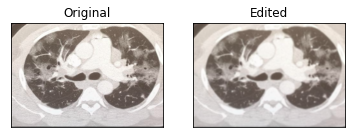

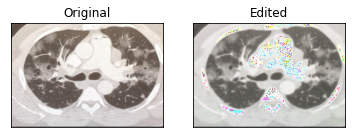

In [ ]:
###### 3. Remove Noise #######


### LEE Filter ####
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance

def lee_filter1(img, ksize):
    img_mean = uniform_filter(np.array(img), (ksize, ksize))
    img_sqr_mean = uniform_filter(img**2, (ksize, ksize))
    img_variance = img_sqr_mean - img_mean**2

    overall_variance = variance(img)

    img_weights = img_variance / (img_variance + overall_variance)
    img_output = img_mean + img_weights * (img - img_mean)
    return img_output



def lee_filter2(np_img, size=(3,3)):
    img_mean = uniform_filter(np_img, size) # mean of the image 
    img_sqr_mean = uniform_filter(np_img**2, size) #square of the mean image
    img_variance = img_sqr_mean - img_mean**2 # kernel variance 

    overall_variance = variance(np_img) # overall variance of the image 

    img_weights = img_variance / (img_variance + overall_variance) #image weight function
    img_output = img_mean + img_weights * (np_img - img_mean) #despeckled image 
    return img_output

# Gaussian ###

fimgs1 = []
fimgs2 = []
for i in range(len(res_imgs)):
    blur = cv2.GaussianBlur(res_imgs[i], (5, 5), 0)  ### CHECK LAST ARGU.
    fimgs1.append(blur)
    # gray = cv2.cvtColor(res_imgs[i], cv2.COLOR_BGR2GRAY)
    fimgs2.append(lee_filter(res_imgs[i],3))

ind = 0

display_two(res_imgs[ind],fimgs1[ind])
display_two(res_imgs[ind],np.uint8(fimgs2[ind]))


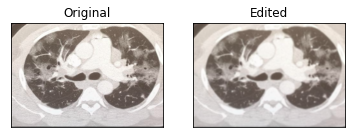

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


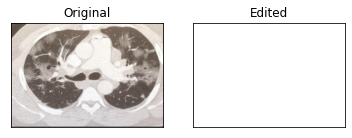

In [ ]:
###### 3. Remove Noise #######


### LEE Filter ####
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance

def lee_filter(img, size = (5,5)):
    img_mean = uniform_filter(np.array(img),size)
    img_sqr_mean = uniform_filter(img**2, size)
    img_variance = img_sqr_mean - img_mean**2

    overall_variance = variance(img)

    img_weights = img_variance / (img_variance + overall_variance)
    img_output = img_mean + img_weights * (img - img_mean)
    return img_output



## Gaussian ###

fimgs1 = []
fimgs2 = []
for i in range(len(res_imgs)):
    blur = cv2.GaussianBlur(res_imgs[i], (5, 5), 0)  ### CHECK LAST ARGU.
    fimgs1.append(blur)
    # gray = cv2.cvtColor(res_imgs[i], cv2.COLOR_BGR2GRAY)
    fimgs2.append(lee_filter(res_imgs[i],5))

ind = 0

display_two(res_imgs[ind],fimgs1[ind])
display_two(res_imgs[ind],np.(fimgs2[ind]))


In [ ]:
print(fimgs2[0])
print(fimgs1[0])


[[[ 79.13989245  68.9922803   66.11167442]
  [ 78.68654898  68.75987686  65.61835042]
  [ 71.35534152  78.53574757  75.59686938]
  ...
  [ 88.93461467  85.63396849  94.3095524 ]
  [ 87.97074757  90.27959946  90.24653522]
  [ 79.49689784  82.58673593  82.64599247]]

 [[ 64.4335274   62.43305956  60.25520963]
  [ 64.47271887  62.45542277  60.26343424]
  [ 64.77039424  62.55008863  61.72470102]
  ...
  [ 94.13176382  98.90120613 103.99331574]
  [ 85.34517348  83.62626842  81.45419977]
  [ 82.79947955  79.10171178  77.29130396]]

 [[ 71.68129966  69.30942957  75.52333957]
  [ 71.79106204  69.43694481  68.02864355]
  [ 72.24899353  70.21629145  69.18405159]
  ...
  [120.79631382 133.38781216 127.7865568 ]
  [106.07716022 107.29988231 115.41181359]
  [ 98.50790726  96.         109.74512521]]

 ...

 [[179.8964111  179.80200779 179.66020445]
  [179.75711151 179.5835826  177.19266472]
  [177.20389375 177.19882799 176.74938652]
  ...
  [164.15860588 163.80005291 161.29797268]
  [160.44647706 16

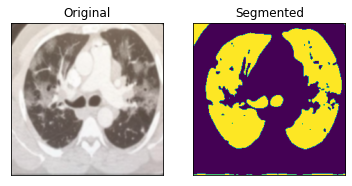

In [ ]:
##### 4. Segmentation & Morphological Transform #####
ind = 0
gray = cv2.cvtColor(fimgs[ind], cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Displaying segmented images
display_two(fimgs[ind], thresh, 'Original', 'Segmented')


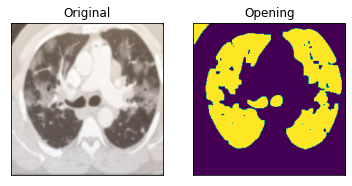

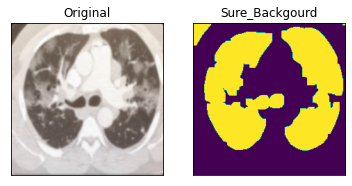

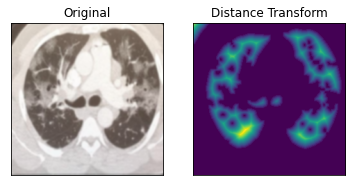

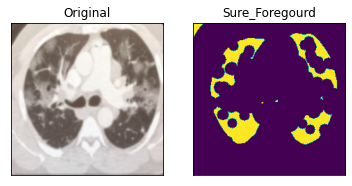

In [ ]:
# Further noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=2)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.35 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

#Displaying segmented back ground
display_two(fimgs[0], opening, 'Original', 'Opening')
display_two(fimgs[0], sure_bg, 'Original', 'Sure_Backgourd')
display_two(fimgs[0], dist_transform, 'Original', 'Distance Transform')
display_two(fimgs[0], sure_fg, 'Original', 'Sure_Foregourd')

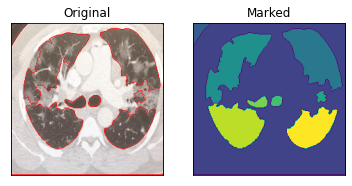

In [ ]:
####### 5. Segmentation and Annotation ########

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

image = res_imgs[0].copy()
markers = cv2.watershed(image, markers)
image[markers == -1] = [255,0 , 0]

# Displaying markers on the image
display_two(image, markers, 'Original', 'Marked')

Working with PIL and Numpy

In [ ]:
import numpy as np
from PIL import Image

img = Image.open(imgs_path[0])
print('Image format: ', img.format)
print('Image mode: ', img.mode)
plt.imshow(img)


In [ ]:
# Image to Array (ndarray)

data = np.asarray(img)
print('data type: ', type(data))
print('data shape: ', data.shape)

data type:  <class 'numpy.ndarray'>
data shape:  (360, 479, 3)


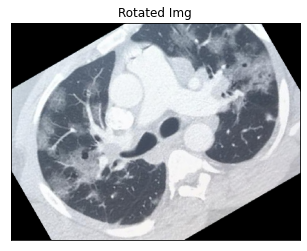

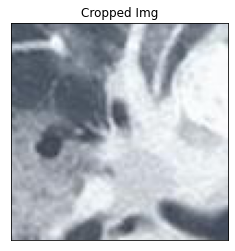

In [ ]:
# Rotation and Crop

Rotation_Degree = 30
box = (100, 100, 200, 200) #left, upper, right, lower


display_one(img.rotate(Rotation_Degree),"Rotated Img")
display_one(img.crop(box),"Cropped Img")

In [ ]:
# np array to img format

img_fromnparray = Image.fromarray(data)
img_fromnparray.show()

print('Image size: ', img_fromnparray.size)
print('Image format: ', img_fromnparray.format)
print('Image mode: ', img_fromnparray.mode)

Image size:  (479, 360)
Image format:  None
Image mode:  RGB


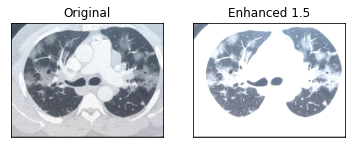

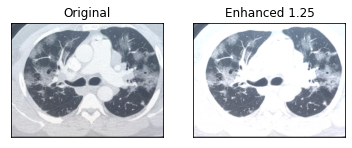

In [ ]:
# Image Enhancement with PIL

from PIL import ImageEnhance

enh2 = ImageEnhance.Brightness(img.copy())
display_two(img,enh2.enhance(1.5),"Original","Enhanced Brightness 1.5")
display_two(img,enh2.enhance(1.25),"Original","Enhanced Brightness 1.25")

Working with Keras

Image type: <class 'PIL.JpegImagePlugin.JpegImageFile'> , image format: JPEG , image mode: RGB , image size: (479, 360)


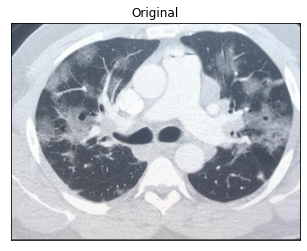

In [ ]:
### Loading Data ####

from keras.preprocessing.image import load_img
img = load_img(imgs_path[0])


print('Image type:', type(img), ', image format:', img.format, ', image mode:', img.mode, ', image size:', img.size)
display_one(img)

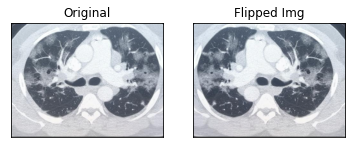

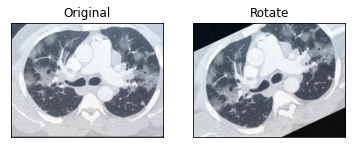

In [ ]:
# Rotation & Flips

from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img

img_nparray = img_to_array(img)
Datagen = ImageDataGenerator()

flip_horizontal = Datagen.apply_transform(x=img_nparray, transform_parameters={'flip_horizontal':True})
rotate = Datagen.apply_transform(x=img_nparray, transform_parameters={'theta':-25})

display_two(img,array_to_img(flip_horizontal),"Original", "Flipped Img")
display_two(img,array_to_img(rotate),"Original", "Rotate")

Working With OpenCV

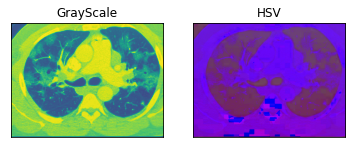

In [ ]:
## Conversions ##

import cv2

im = cv2.imread(imgs_path[0])

gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)  # GrayScale
hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)    # HSV

display_two(gray,hsv,"GrayScale","HSV")

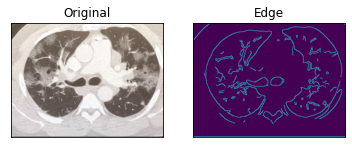

In [ ]:
## Canny Edge Detection ##

blur = cv2.medianBlur(im, 5)
edge = cv2.Canny(blur, 100, 200)

display_two(im,edge,"Original","Edge")